<a href="https://colab.research.google.com/github/DanielOkyere/ann_project_implementation/blob/master/Ann_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import std, mean
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report as clp
from sklearn.metrics import accuracy_score as asc

In [ ]:
def prepare_dataset(time_steps, data):
    """Prepares the dataset"""
    dataset_range = time_steps * 32592
    custom_steps = data[data["date"] < time_steps]

    X = np.array(custom_steps.drop(labels=["final_result", "id_student"], axis=1))
    Y = np.array(custom_steps["final_result"])

    # Apply OneHotEncoder
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(Y)

    # define Min max scaler
    scaler = MinMaxScaler()
    target_strings = label_encoder.classes_
    X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=(1000 * time_steps)
    )

    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)

    # Reshape data for working with
    X_train = X_train.reshape(-1, time_steps, 71)
    Y_train = Y_train.reshape(-1, time_steps, 4)

    X_test = X_test.reshape(-1, time_steps, 71)
    Y_test = Y_test.reshape(-1, time_steps, 4)

    return X_train, X_test, Y_train, Y_test, target_strings

In [ ]:
def evaluate_model(trainX, trainY, testX, testY, timesteps, target_strings):
    """Evaluation and application of Model"""
    epochs, batch_size = 100, 100

    # Building the ANN-LSTM
    classifier = Sequential()
    classifier._name = "ANN-LSTM"
    classifier.add(
        LSTM(
            200,
            input_shape=(time_steps, 71),
            return_sequences=True,
            recurrent_dropout=0.2,
            name="LSTM_Layer",
        )
    )
    classifier.add(Dropout(0.5, name="Dropout_layer"))
    classifier.add(Dense(units=100, activation="relu", name="ANN_Hidden_Layer"))

    classifier.add(Dense(units=4, activation="softmax", name="ANN_Output_Layer"))

    classifier.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["categorical_accuracy"],
    )

    # print summary of model
    # print(classifier.summary())

    # Train the classifier model
    history = classifier.fit(
        trainX,
        trainY,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        validation_split=0.2,
    )

    # Test Model
    _, accuracy = classifier.evaluate(testX, testY, batch_size=batch_size, verbose=1)

    # Predictions
    predicted = classifier.predict(testX)
    predictions = [np.round(value) for value in predicted]

    d = np.array(predictions, dtype=np.int32)
    testy = np.vstack(testY)
    d = np.vstack(d)

    report = clp(testy, d, target_names=target_strings)
    # print(report)

    return accuracy

In [ ]:
def summarize_results(mscores, sscores, time_steps, all_accuracy):
    print(
        "\n time steps=%d  Evaluation Accuracy: %.3f%% (+/-%.3f)\n"
        % (time_steps, mscores, sscores)
    )
    # print graph of result
    plt.title("Categorical Accuracy")

    plt.plot(all_accuracy, label="test")
    plt.ylabel("categorical accuracy")
    plt.xlabel("days")
    plt.legend(["test"], loc="upper left")
    plt.legend()
    plt.show()

In [ ]:
 # import data into application

data = pd.read_csv("./data_final.csv")

print(data.head())

    # data preprocessing
time_step = 0
scores = list()
accuracy = list()
for time_steps in range(1, 271):
    X_train, X_test, Y_train, Y_test, target_strings = prepare_dataset(time_steps=time_steps, data=data)

    score = evaluate_model(trainX=X_train,trainY=Y_train,testX=X_test,testY=Y_test,timesteps=time_steps,target_strings=target_strings)

    scores.append(score)
    time_step += 1

   Unnamed: 0  id_student  date  homepage  oucontent  subpage  url  forumng  \
0           0       11391     0      10.0       21.0      0.0  0.0     15.0   
1           1       11391     1       9.0      102.0      8.0  1.0      3.0   
2           2       11391     2       3.0        0.0      0.0  0.0      0.0   
3           3       11391     3       0.0        0.0      0.0  0.0      0.0   
4           4       11391     4       0.0        0.0      0.0  0.0      0.0   

   resource  repeatactivity  ...  imd_band_50-60%  imd_band_60-70%  \
0       3.0             0.0  ...              0.0              0.0   
1       4.0             0.0  ...              0.0              0.0   
2       1.0             0.0  ...              0.0              0.0   
3       0.0             0.0  ...              0.0              0.0   
4       0.0             0.0  ...              0.0              0.0   

   imd_band_70-80%  imd_band_80-90%  imd_band_90-100%  age_band_0-35  \
0              0.0              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 3s 81ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 4s 109ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 3s 97ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 157ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 4s 118ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 145ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 4s 120ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 146ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 140ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 153ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 6s 184ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 149ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 142ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 5s 148ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 6s 188ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 6s 183ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 7s 203ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 7s 224ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: ignored


 time steps=26  Evaluation Accuracy: 0.555% (+/-0.088)



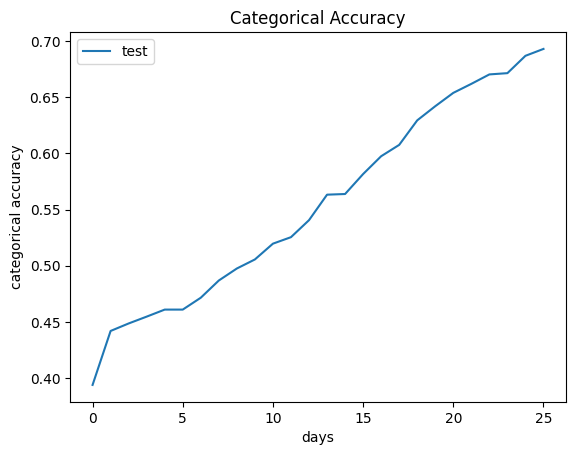

In [ ]:
summarize_results(time_steps=time_step, all_accuracy=scores, mscores=mean(scores), sscores=std(scores))